# Athlete To Normal People Comparison

### Things to investigate in this notebook:
- Can we find people in a set of ordinary people that may have what it takes to be an olympic athlete?

### Import packages and clean the dataset.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import athletes
path_to_csv = os.path.join("..", "data", "athlete_events.csv")
athletes = pd.read_csv(path_to_csv)

# import regions
path_to_regions_csv = os.path.join("..", "data", "noc_regions.csv")
regions = pd.read_csv(path_to_regions_csv)

In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
regions.drop(columns=["notes"], inplace=True)
regions.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [7]:
athletes = pd.merge(athletes, regions, on="NOC", how="left")
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [8]:
# Replace NANs for medals with "none"
athletes["Medal"].replace(np.NaN, "None", inplace=True)
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands


In [9]:
# Drop all rows containing NaN
athletes.dropna(how="any", inplace=True)
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None,Netherlands
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands


## Focus on Gender, Height, Weight per Sport:

### Keep the following Columns: 
- Sex
- Height
- Weight
- Year (Not Considered in Algorithm)
- Season (Not Considered in Algorithm)
- Sport (Not Considered in Algorithm)
- Event (Not Considered in Algorithm)

In [10]:
# Drop unnecessary columns and add column for athlete:
athletes.drop(columns=["ID", "Name", "Team", "NOC", "Games", "City", "Medal", "region"], inplace=True)
athletes["Status"] = "Athlete"

## Machine Learning Model Time:

#### Might need to make a new column to specify they are an athlete

In [27]:
# Input sport and breakdown dataframe to sex, height, weight:

filter_ = "Event"
category = "Athletics Men's Javelin Throw"

athletes_sport = athletes.loc[athletes[filter_] == category].copy()

athletes_sport.drop(columns=["Age", "Year", "Season", "Sport", "Event"], inplace=True)

athletes_sport.tail(20)

,Sex,Height,Weight,Status
265608,M,184.0,112.0,Athlete
265684,M,190.0,100.0,Athlete
266089,M,179.0,90.0,Athlete
266090,M,179.0,90.0,Athlete
266091,M,179.0,90.0,Athlete
266222,M,195.0,93.0,Athlete
266223,M,195.0,93.0,Athlete
267285,M,180.0,87.0,Athlete
267286,M,180.0,87.0,Athlete
268134,M,192.0,95.0,Athlete


## Import random people dataset, label as Ordinary, and concat dataframes

In [28]:
# import ordinary people
path_to_ordinary_csv = os.path.join("..", "data", "500_Person_Gender_Height_Weight_Index.csv")
ordinary = pd.read_csv(path_to_ordinary_csv)

In [29]:
ordinary.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [30]:
ordinary.rename(columns={"Gender":"Sex"}, inplace=True)

In [31]:
def gender_match(row):
    if row["Sex"] == "Male":
        val = "M"
    else:
        val = "F"
    return val

ordinary["Sex"] = ordinary.apply(gender_match, axis=1)

ordinary["Status"] = "Ordinary"
ordinary.drop(columns="Index", inplace=True)

ordinary.head()

,Sex,Height,Weight,Status
0,M,174,96,Ordinary
1,M,189,87,Ordinary
2,F,185,110,Ordinary
3,F,195,104,Ordinary
4,M,149,61,Ordinary


In [32]:
people_df = pd.concat([athletes_sport, ordinary])
people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 436 to 499
Data columns (total 4 columns):
Sex       1093 non-null object
Height    1093 non-null float64
Weight    1093 non-null float64
Status    1093 non-null object
dtypes: float64(2), object(2)
memory usage: 42.7+ KB


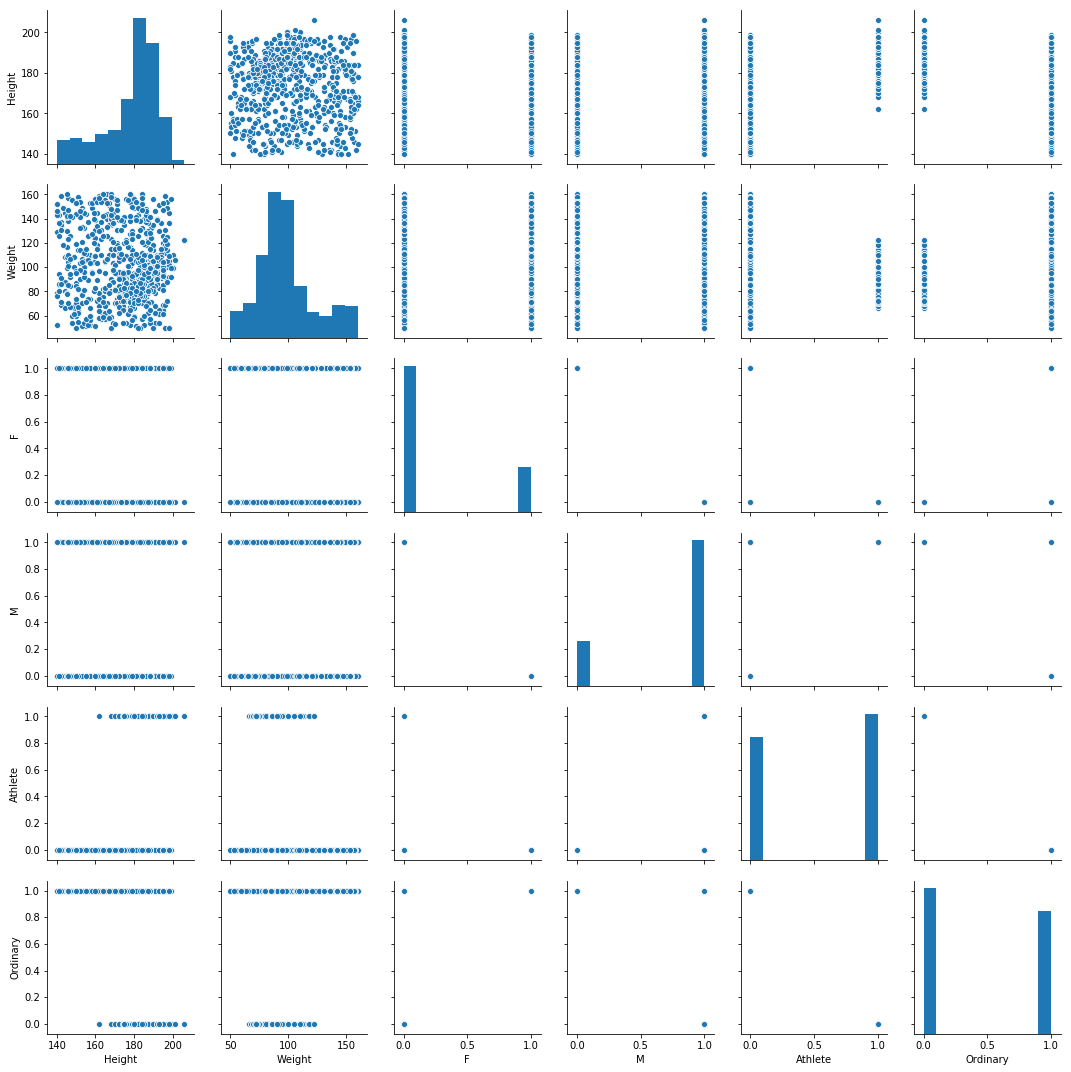

In [33]:
n = pd.get_dummies(people_df.Sex)
people_compare = pd.concat([people_df,n], axis=1)

m = pd.get_dummies(people_compare.Status)
people_compare = pd.concat([people_compare, m], axis=1)

people_compare.drop(["Sex", "Status"], inplace=True, axis=1)

sns.pairplot(people_compare)

In [34]:
# Create X and y variables:

X = people_df.drop(columns="Status")
y = people_df.Status

In [35]:
# Create dummies
n = pd.get_dummies(X.Sex)
X = pd.concat([X,n], axis=1)
X.drop(["Sex"], inplace=True, axis=1)
X.head()

,Height,Weight,F,M
436,194.0,96.0,0,1
1547,185.0,94.0,0,1
2534,186.0,91.5,0,1
2575,174.0,81.0,0,1
3107,185.0,79.0,0,1


In [36]:
# Create training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [37]:
# Start Logistical Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
classifier.fit(X_train, y_train)

C:\Users\mtoriello0725\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9010989010989011
Testing Data Score: 0.8905109489051095


In [40]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Athlete' 'Ordinary' 'Athlete' 'Athlete' 'Ordinary' 'Athlete' 'Athlete'
 'Ordinary' 'Athlete' 'Athlete']
First 10 Actual labels: ['Athlete', 'Ordinary', 'Athlete', 'Athlete', 'Ordinary', 'Athlete', 'Ordinary', 'Ordinary', 'Ordinary', 'Athlete']


In [41]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Athlete,Athlete
1,Ordinary,Ordinary
2,Athlete,Athlete
3,Athlete,Athlete
4,Ordinary,Ordinary
5,Athlete,Athlete
6,Athlete,Ordinary
7,Ordinary,Ordinary
8,Athlete,Ordinary
9,Athlete,Athlete


# Do not see how this model can be useful... Bust